In [906]:
from qiskit import QuantumCircuit, Aer, execute, transpile, execute, IBMQ
from qiskit_aer import AerSimulator

from qiskit.tools.monitor import job_monitor
from qiskit.circuit.library import RGQFTMultiplier

from qiskit.circuit import Instruction, CircuitInstruction, Qubit, QuantumRegister, Clbit, ClassicalRegister
from qiskit.circuit.library.standard_gates import IGate, XGate, CXGate, CCXGate, C3XGate, C4XGate, MCXGate
from qiskit.exceptions import QiskitError

import matplotlib.pyplot as plt
%matplotlib inline
from qiskit.visualization import plot_histogram

import os
import sys
import math as m
import numpy as np
import pandas as pd
import sympy

from _functools import *
from traceback import format_exc

# Define Functions

Functions that are general but customary should be defined. These functions are considered customary since they may or may not be standard functions and methods provided in default by Python.

## afmtsd() function
<br>
<div>
"afmtsd" stands for "Add for making the same digits".<br>
This function can add some letters or numbers to the front for various purposes, including sorting purposes. For example, if one desires to sort an array ['00011', '100'], making '100' (3 digits) to become '00100' (5 digits) can make use of this function by calling afmtsd(['00011', '100'], '0', 5).

</div>

In [907]:
def afmtsd(the_list_original, chara, ndigits):
    # afmtsd stands for "Add for making the same digits"
    the_list = list(the_list_original)
    a = [chara]*(ndigits-len(the_list)) + the_list
    
    if type(the_list_original) == type(''): return ''.join(a)
    else: return a

## setInputs() function
### Convert to Excited State
<br>
<div>
This function use X Gates to convert the ground state |0> to the excited state |1>

(Excited state means any quantum state having energy larger than the ground state |0>.)
    
(<a href='#Set-the-Inputs'>See how it is implemented.</a>)

</div>

In [908]:
def setInputs(A, B):
    if A < 0:
        mCirc.data[0].operation.name = 'x'

    if B < 0:
        mCirc.data[inputDigits+1].operation.name = 'x'

    ABin, BBin = bin(abs(A))[2:], bin(abs(B))[2:]
    ABin, BBin = afmtsd(ABin, '0', inputDigits), afmtsd(BBin, '0', inputDigits)

    # Operand A
    print('A in Binary Digits :', ABin, end='\n\n')

    for ADigit, AIndex in zip(ABin, range(len(ABin))[::-1]):
        ABinInput = int(ADigit)

        if ABinInput == 1: gateName = 'x'
        else: gateName = 'id'

        mCirc.data[AIndex+1].operation.name = gateName

        print(AIndex+1, ADigit, gateName)

    print(f'\n{"-"*100}\n')

    # Operand B
    print('B in Binary Digits :', BBin, end='\n\n')

    for BDigit, BIndex in zip(BBin, range(len(BBin))[::-1]):
        BBinInput = int(BDigit)

        if BBinInput == 1: gateName = 'x'
        else: gateName = 'id'

        mCirc.data[BIndex+2+inputDigits].operation.name = gateName

        print(BIndex+2+inputDigits, BDigit, gateName)

## execCirc() function
### Implement the Program with Combinations of Input States

<br>
<div>
This function can execute the Circuit by using default values, which are matrix_product_state Simulator since it can implement with higher memory usage and 2000 shots. (<a href='#Execute-the-Circuit'>See how it is implemented.</a>)
<br><br>
Note: Default arguments in Python can be modified.
</div>

In [909]:
def execCirc(backend=AerSimulator(method='matrix_product_state'), shots=2000):
    job = execute(mCirc, backend, shots=shots)
    result = job.result()
    counts = result.get_counts()

    # Raw Result String
    resultRaw = list(counts)[0]

    # Separating the Number from the Sign Indicator
    resultBinNum = resultRaw[-nOutput:]
    resultDecNum = int(resultBinNum, 2)

    if resultRaw[0] == '1':
        resultDecNum *= -1

    print(f'Expression: {A}*{B}')
    print('---')
    print(f'counts: {counts}')
    print(f'resultBinNum: {resultBinNum}')
    print(f'resultDecNum: {resultDecNum}')

In [910]:
inputDigits = 10

In [911]:
nInputs = inputDigits + inputDigits + 2
nOutput = 2*inputDigits

nQubits = nInputs+nOutput

q = QuantumRegister(nQubits,'q')
c = ClassicalRegister(nOutput+1,'c')

mCirc = QuantumCircuit(q, c)

# Circuit 1 (Numerator Circuit)

## Determine Input Value (Either 0 or 1)

### Initialization Gates

First, zero it out at the beginning.<br>
All qubits start from ground state |0>. Create manipulable initialization gates as many as the input qubits.<br>
The identity gate means that it remains the same state as previous, which, in this case, the ground state |0>.
<br><br>
Later, the Identity gate can be converted to an X Gate or NOT gate.

In [912]:
mCirc.data = [CircuitInstruction(operation=Instruction(name='id', num_qubits=1, num_clbits=0, params=[]),
                                 qubits=(Qubit(q, inputIndex),),
                                 clbits=()) for inputIndex in range(nInputs)]

See the Results:

In [913]:
list(mCirc.data)

[CircuitInstruction(operation=Instruction(name='id', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(42, 'q'), 0),), clbits=()),
 CircuitInstruction(operation=Instruction(name='id', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(42, 'q'), 1),), clbits=()),
 CircuitInstruction(operation=Instruction(name='id', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(42, 'q'), 2),), clbits=()),
 CircuitInstruction(operation=Instruction(name='id', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(42, 'q'), 3),), clbits=()),
 CircuitInstruction(operation=Instruction(name='id', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(42, 'q'), 4),), clbits=()),
 CircuitInstruction(operation=Instruction(name='id', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(42, 'q'), 5),), clbits=()),
 CircuitInstruction(operation=Instruction(name='id', num_qubits=1, num_clbits=0, params=[]), q

## Set the Inputs
Set the Inputs by using <a href='#setInputs()-function'>setInputs()</a>

In [914]:
A, B = -7, -6
setInputs(A, B)

A in Binary Digits : 0000000111

10 0 id
9 0 id
8 0 id
7 0 id
6 0 id
5 0 id
4 0 id
3 1 x
2 1 x
1 1 x

----------------------------------------------------------------------------------------------------

B in Binary Digits : 0000000110

21 0 id
20 0 id
19 0 id
18 0 id
17 0 id
16 0 id
15 0 id
14 1 x
13 1 x
12 0 id


See the Results:

In [915]:
list(mCirc.data)

[CircuitInstruction(operation=Instruction(name='x', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(42, 'q'), 0),), clbits=()),
 CircuitInstruction(operation=Instruction(name='x', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(42, 'q'), 1),), clbits=()),
 CircuitInstruction(operation=Instruction(name='x', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(42, 'q'), 2),), clbits=()),
 CircuitInstruction(operation=Instruction(name='x', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(42, 'q'), 3),), clbits=()),
 CircuitInstruction(operation=Instruction(name='id', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(42, 'q'), 4),), clbits=()),
 CircuitInstruction(operation=Instruction(name='id', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(42, 'q'), 5),), clbits=()),
 CircuitInstruction(operation=Instruction(name='id', num_qubits=1, num_clbits=0, params=[]), qubit

In [916]:
mCirc1 = RGQFTMultiplier(num_state_qubits=inputDigits,
                         num_result_qubits=inputDigits*2)

input1Qubits = (np.arange(1, inputDigits+1)).tolist()
input2Qubits = (np.arange(1, inputDigits+1) + inputDigits+1).tolist()

inputQubits = input1Qubits + input2Qubits

outputQubits = (np.arange(0, nOutput) + (inputDigits+1)*2).tolist()

mCirc.append(mCirc1, inputQubits + outputQubits)

## Use CNOT or CX gate

Use CNOT or CX gate (Quantum XOR gate) properties to determine signs.

There are 2 qubits that are dedicated for sign indicators only.

"+" or positive numbers is represented by the ground state |0>.
"-" or negative numbers is represented by the excited state |1>.

<table align='left' id='BigTable'>

<tr>
<th style="text-align: left">Positive, Negative number multiplications</th>
<th style="text-align: left">Similar XOR Gate properties</th>
</tr>

<tr><td>
<table align='left'>

<tr>
<th style="text-align: left">A sign</th>
<th style="text-align: left">B sign</th>
<th style="text-align: left">A*B sign</th>
</tr>

<tr>
<td style="text-align: left">+</td>
<td style="text-align: left">+</td>
<td style="text-align: left">+</td>
</tr>

<tr>
<td style="text-align: left">+</td>
<td style="text-align: left">-</td>
<td style="text-align: left">-</td>
</tr>

<tr>
<td style="text-align: left">-</td>
<td style="text-align: left">+</td>
<td style="text-align: left">-</td>
</tr>

<tr>
<td style="text-align: left">-</td>
<td style="text-align: left">-</td>
<td style="text-align: left">+</td>
</tr>

</table>

</td>

<td>
<table align='left'>

<tr>
<th style="text-align: left">A sign</th>
<th style="text-align: left">B sign</th>
<th style="text-align: left">A^B (A ⊕ B)</th>
</tr>

<tr>
<td style="text-align: left">0</td>
<td style="text-align: left">0</td>
<td style="text-align: left">0</td>
</tr>

<tr>
<td style="text-align: left">0</td>
<td style="text-align: left">1</td>
<td style="text-align: left">1</td>
</tr>

<tr>
<td style="text-align: left">1</td>
<td style="text-align: left">0</td>
<td style="text-align: left">1</td>
</tr>

<tr>
<td style="text-align: left">1</td>
<td style="text-align: left">1</td>
<td style="text-align: left">0</td>
</tr>

</table>

</td></tr>

</table>

Then, measure it by putting the result on a classical bit.

In [917]:
mCirc.append(CXGate(), [0, inputDigits+1])
mCirc.measure(inputDigits+1, nOutput)

## Reading Results other than Sign Indicator Parts

Measure Results other than Sign Indicator Parts by putting the results on a classical bit.

In [918]:
rangeLimit = 2**inputDigits

# Qubit Range
QRange = outputQubits

# Classical Bit Range
CRange = range(len(outputQubits))

mCirc.measure(QRange, CRange)

## Execute the Circuit
Execute the Circuit by using <a href='#execCirc()-function'>execCirc()</a>

In [919]:
execCirc()

Expression: -7*-6
---
counts: {'000000000000000101010': 2000}
resultBinNum: 00000000000000101010
resultDecNum: 42


## Draw the Circuit

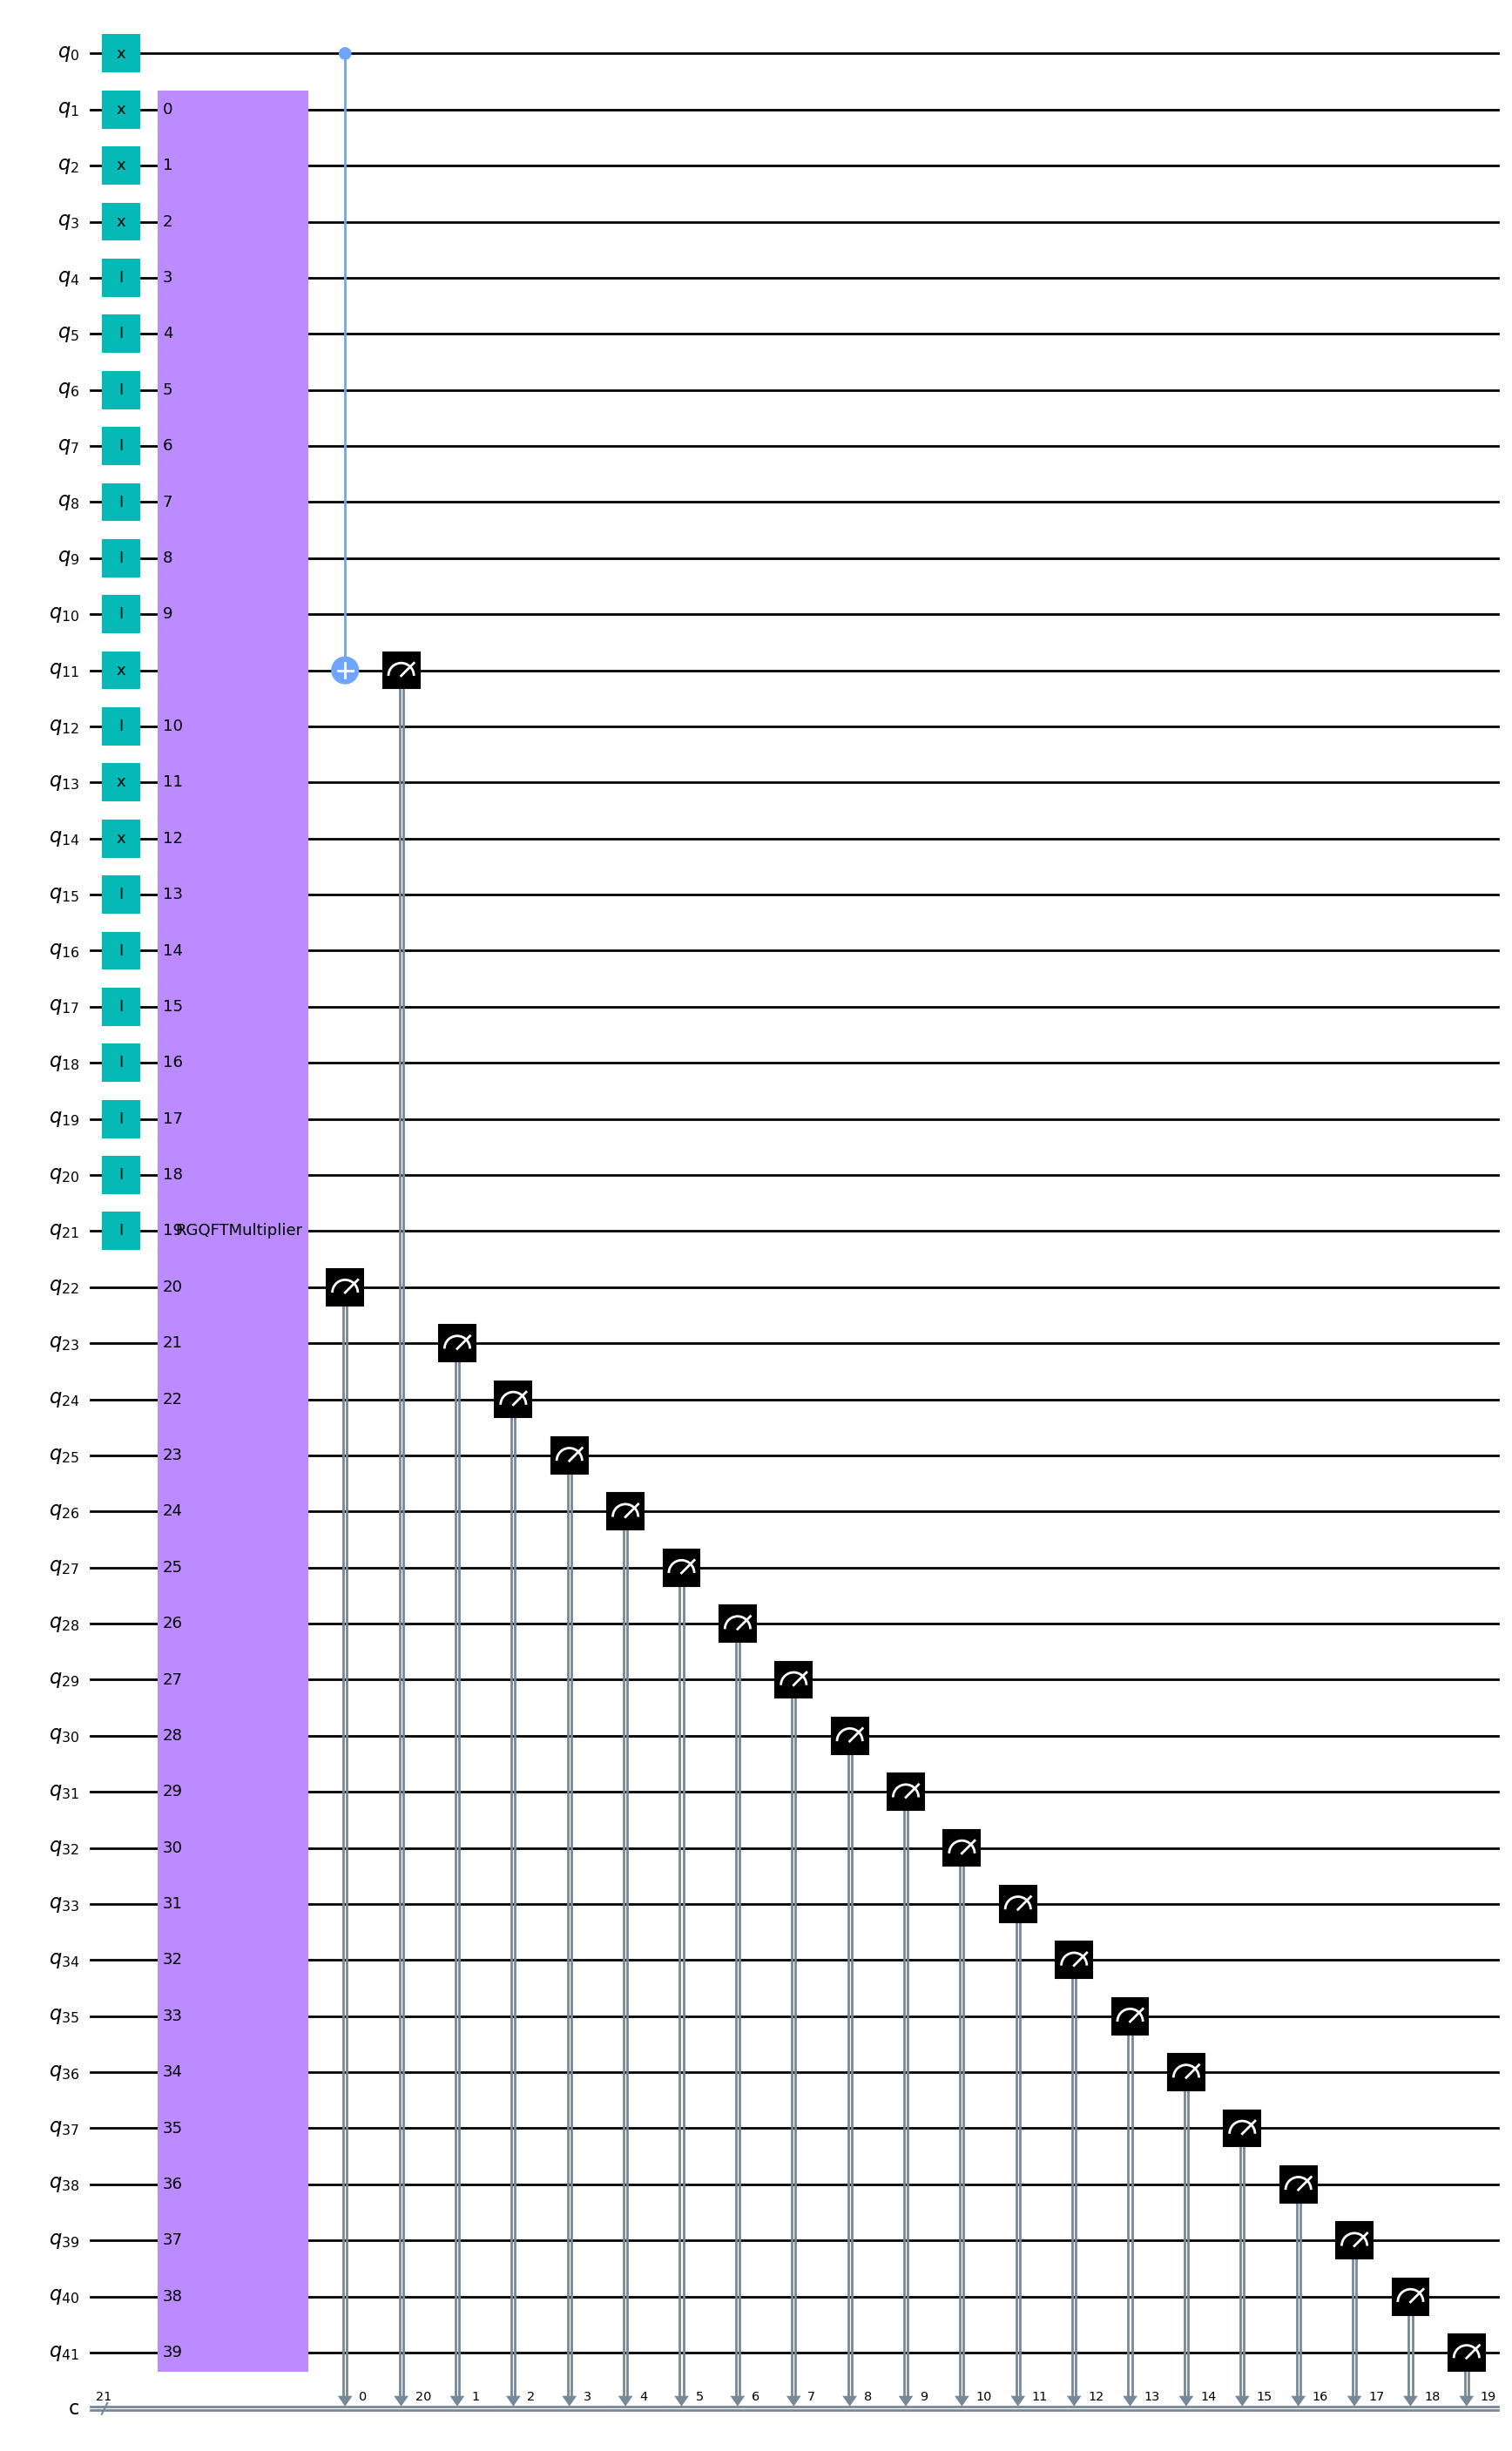

In [920]:
mCirc.draw(output='mpl')

# Circuit 2

## Set the Inputs
Set the Inputs by using <a href='#setInputs()-function'>setInputs()</a>

In [921]:
A, B = -4, -5
setInputs(A, B)

A in Binary Digits : 0000000100

10 0 id
9 0 id
8 0 id
7 0 id
6 0 id
5 0 id
4 0 id
3 1 x
2 0 id
1 0 id

----------------------------------------------------------------------------------------------------

B in Binary Digits : 0000000101

21 0 id
20 0 id
19 0 id
18 0 id
17 0 id
16 0 id
15 0 id
14 1 x
13 0 id
12 1 x


## Execute the Circuit
Execute the Circuit by using <a href='#execCirc()-function'>execCirc()</a>

In [922]:
execCirc()

Expression: -4*-5
---
counts: {'000000000000000010100': 2000}
resultBinNum: 00000000000000010100
resultDecNum: 20


## Draw the Circuit

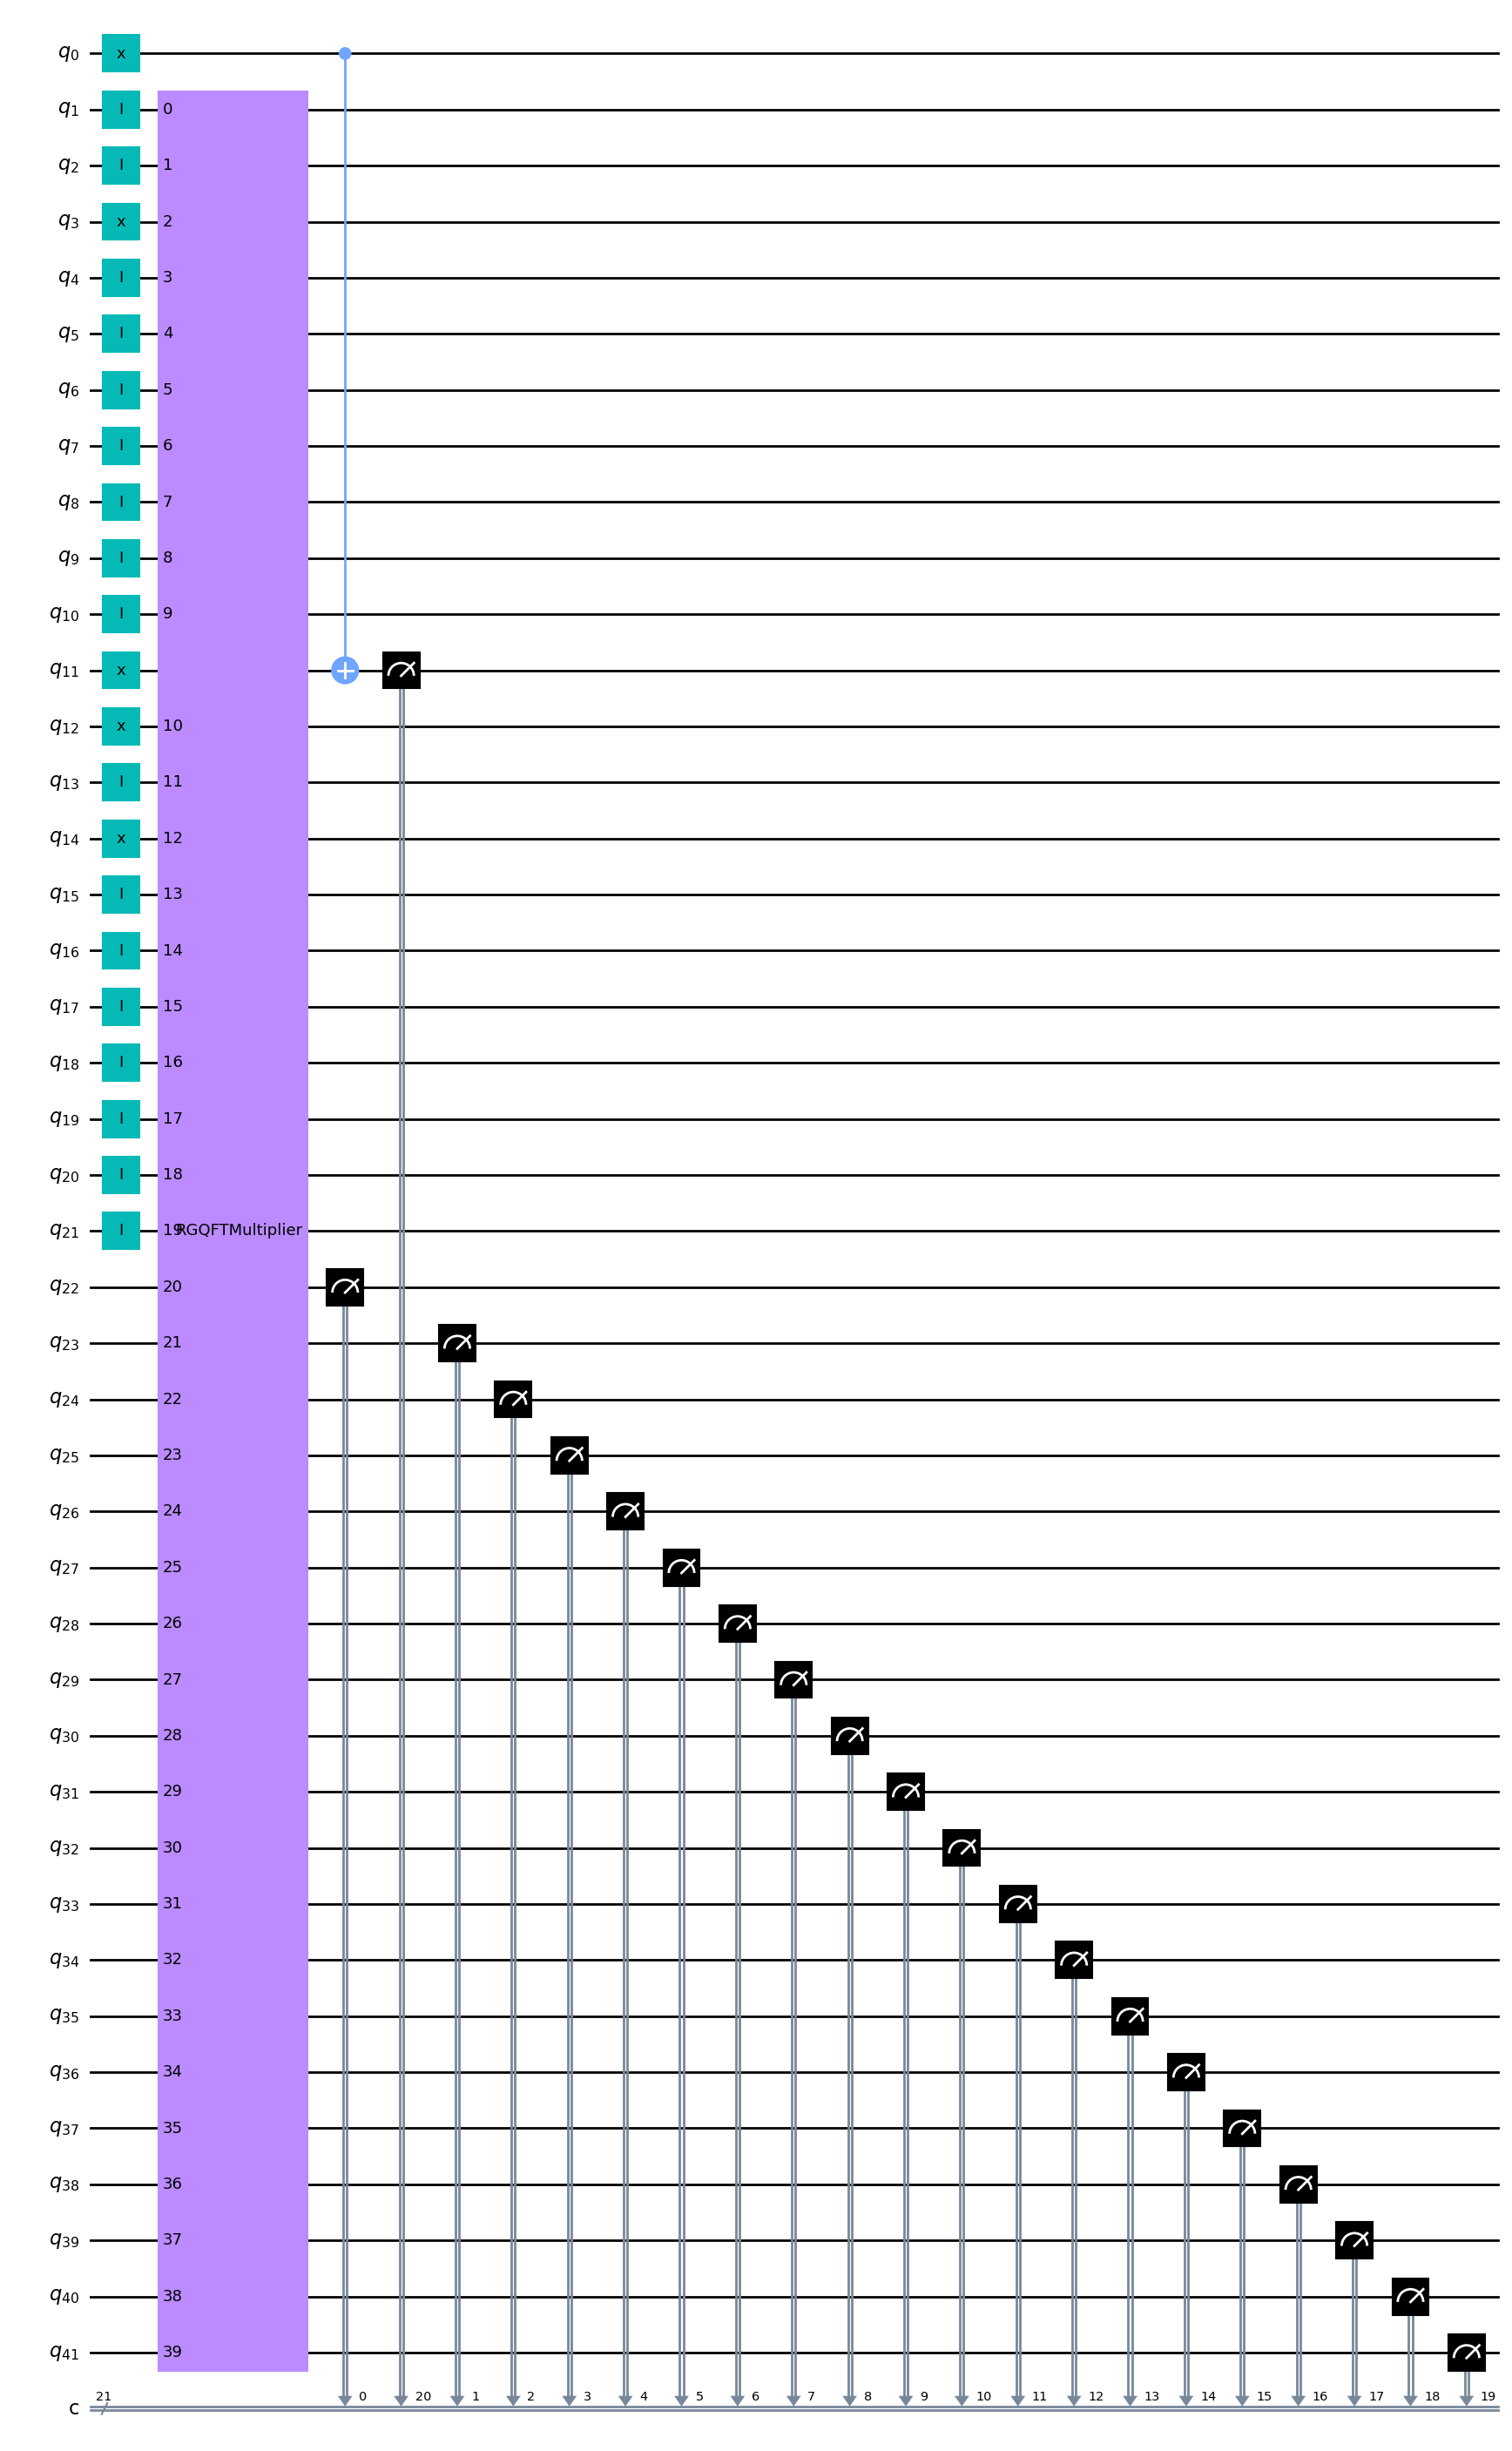

In [923]:
mCirc.draw(output='mpl')

See the Results:

In [924]:
list(mCirc.data)

[CircuitInstruction(operation=Instruction(name='x', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(42, 'q'), 0),), clbits=()),
 CircuitInstruction(operation=Instruction(name='id', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(42, 'q'), 1),), clbits=()),
 CircuitInstruction(operation=Instruction(name='id', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(42, 'q'), 2),), clbits=()),
 CircuitInstruction(operation=Instruction(name='x', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(42, 'q'), 3),), clbits=()),
 CircuitInstruction(operation=Instruction(name='id', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(42, 'q'), 4),), clbits=()),
 CircuitInstruction(operation=Instruction(name='id', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(42, 'q'), 5),), clbits=()),
 CircuitInstruction(operation=Instruction(name='id', num_qubits=1, num_clbits=0, params=[]), qub